# Tensoreflow

In [ ]:
https://www.kaggle.com/datasets/shayanfazeli/heartbeat?select=ptbdb_normal.csv

https://physionet.org/content/nsrdb/1.0.0/
https://physionet.org/content/chfdb/1.0.0/

https://www.kaggle.com/code/khatri007/detection-of-congestive-heart-failure-using-ecg


In [ ]:
import tensorflow as tf
import numpy as np


c = [-40, -10, 0, 15, 22, 38, 50]
f = [-40.0, 14.0, 32.0, 59.0, 71.6, 100.4, 122.0]




l0 = tf.keras.layers.Dense(units=3, input_shape=[1])
l1 = tf.keras.layers.Dense(units=2)
l2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l0,l1,l2])

model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))



cel_in = np.array(c, dtype = float)
far_out = np.array(f, dtype = float)

history = model.fit(cel_in,far_out, epochs = 100)


Epoch 1/100
1/1 [==============================] - 0s 396ms/step - loss: 7991.1831
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 5803.0078
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 4004.0237
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 2565.3464
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 1520.7377
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 919.4979
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 819.2669
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 1143.8015
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 1475.7648
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 1482.6376
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 1236.2489
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 940.4468
Epoch 13/100
1/1 [========

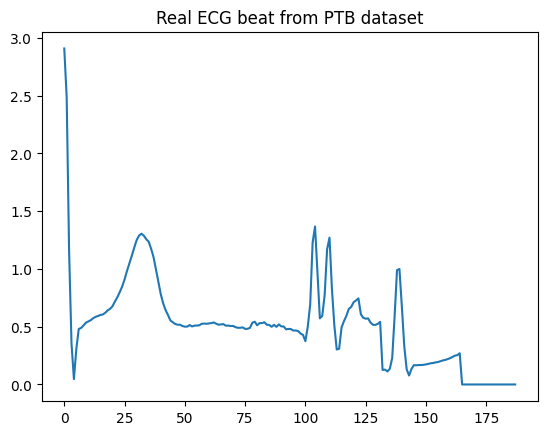

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# load one ECG sample (1 beat)
ecg = np.loadtxt(r"C:\Users\RAZER\Desktop\archive\ptbdb_normal.csv", delimiter=",")
ecg_signal = ecg[0]+ecg[1]+ecg[2]   # first heartbeat

plt.plot(ecg_signal)
plt.title("Real ECG beat from PTB dataset")
plt.show()



In [11]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (4046, 187)
y shape: (4046, 188)


In [9]:
def smooth(x, k=7):
    return np.convolve(x, np.ones(k)/k, mode='same')

clean_target = smooth(ecg_signal)


X = ecg[:, :-1]    # remove last column if shape mismatch
y = np.apply_along_axis(smooth, 1, ecg)


signal shape: (4046, 187)
label shape: (4046,)
X shape: (4046, 187)
y shape: (4046, 187)
Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0246  
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.0079
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.0074
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0072
Epoch 5/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.0071
Epoch 6/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.0070
Epoch 7/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.0069
Epoch 8/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0069
Epoch 9/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.0066
Epoch 10/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.0059
Epoch 11/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.0052
Epoch 12/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 0.0050
Epoch 13/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.0049
Epoch 14/2

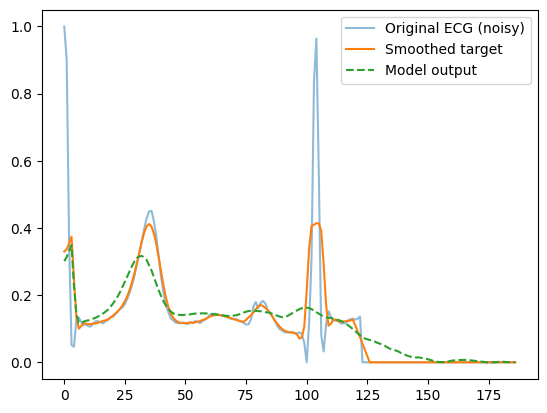

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Load data (no header)
data = np.loadtxt(r"C:\Users\RAZER\Desktop\archive\ptbdb_normal.csv", delimiter=",")
# 2. Split into signal and label
signal = data[:, :-1]   # shape: (4046, 187)
label  = data[:, -1]    # shape: (4046,)

print("signal shape:", signal.shape)
print("label shape:", label.shape)

# 3. Define smoothing function
def smooth(x, k=7):
    return np.convolve(x, np.ones(k)/k, mode="same")

# 4. Build X and y for denoising
X = signal.astype("float32")                              # noisy
y = np.apply_along_axis(smooth, 1, signal).astype("float32")  # smoothed

print("X shape:", X.shape)   # (4046, 187)
print("y shape:", y.shape)   # (4046, 187)

# 5. Model: same style as your teaching code, just more inputs
n_features = X.shape[1]  # 187

l0 = tf.keras.layers.Dense(units=3, input_shape=[n_features])
l1 = tf.keras.layers.Dense(units=2)
l2 = tf.keras.layers.Dense(units=n_features)

model = tf.keras.Sequential([l0, l1, l2])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(0.001))

history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# 6. Visualize one heartbeat
idx = 0
orig = X[idx]
target = y[idx]
pred = model.predict(X[idx:idx+1])[0]

plt.plot(orig, label="Original ECG (noisy)", alpha=0.5)
plt.plot(target, label="Smoothed target")
plt.plot(pred, label="Model output", linestyle="--")
plt.legend()
plt.show()


# PyTorch

In [ ]:
import numpy as np


def create_neuron(n_inputs):
    # weights: (n_inputs, 1), bias: (1, 1)
    W = 0.01 * np.random.randn(n_inputs, 1)
    b = np.zeros((1, 1))
    return {"W": W, "b": b}

def neuron_forward(x, neuron):
    """
    x: (N, n_inputs)
    returns: (N, 1)
    """
    return x @ neuron["W"] + neuron["b"]


def create_layer(n_inputs, n_outputs):
    """
    Fully-connected layer: x -> x @ W + b
    W: (n_inputs, n_outputs)
    b: (1, n_outputs)
    """
    params = {
        "W": 0.01 * np.random.randn(n_inputs, n_outputs),
        "b": np.zeros((1, n_outputs))
    }
    return params

def relu(x):
    return np.maximum(0, x)

def relu_backward(x):
    # derivative of ReLU w.r.t x
    return (x > 0).astype(float)


def mse_loss(y_pred, y_true):
    """
    y_pred, y_true: (N, output_dim)
    return: (loss_scalar, dL/dy_pred)
    """
    N = y_true.shape[0]
    loss = np.mean((y_pred - y_true) ** 2)
    dloss = 2 * (y_pred - y_true) / N  # dL/dy_pred
    return loss, dloss

def forward(x, params):
    """
    x: (N, D_in)
    params: dict with W1, b1, W2, b2
    """
    # layer 1
    z1 = x @ params["W1"] + params["b1"]   # (N, H)
    a1 = relu(z1)                          # (N, H)

    # layer 2
    z2 = a1 @ params["W2"] + params["b2"]  # (N, D_out)
    y_pred = z2                            # linear output

    # cache for backprop
    cache = {
        "x": x,
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "y_pred": y_pred
    }
    return y_pred, cache


def backward(dy, cache, params):
    """
    dy: dL/dy_pred, shape (N, D_out)
    cache: saved tensors from forward
    params: current parameters

    returns grads dict with dW1, db1, dW2, db2
    """
    x = cache["x"]
    z1 = cache["z1"]
    a1 = cache["a1"]

    grads = {}

    # --- layer 2: z2 = a1 @ W2 + b2, y = z2 ---
    # dy already = dL/dz2
    grads["W2"] = a1.T @ dy                       # (H, N) @ (N, D_out) = (H, D_out)
    grads["b2"] = np.sum(dy, axis=0, keepdims=True)  # (1, D_out)
    da1 = dy @ params["W2"].T                     # (N, D_out) @ (D_out, H) = (N, H)

    # --- back through ReLU in layer 1 ---
    dz1 = da1 * relu_backward(z1)                 # (N, H)

    # --- layer 1: z1 = x @ W1 + b1 ---
    grads["W1"] = x.T @ dz1                       # (D_in, N) @ (N, H) = (D_in, H)
    grads["b1"] = np.sum(dz1, axis=0, keepdims=True) # (1, H)

    return grads

def sgd_update(params, grads, lr=0.1):
    for key in params:
        params[key] -= lr * grads[key]





In [ ]:
import numpy as np

# ===== 1. Utility pieces (neuron, layer, activations, loss, etc.) =====

def create_neuron(n_inputs):
    W = 0.01 * np.random.randn(n_inputs, 1)
    b = np.zeros((1, 1))
    return {"W": W, "b": b}

def neuron_forward(x, neuron):
    return x @ neuron["W"] + neuron["b"]

def create_layer(n_inputs, n_outputs):
    params = {
        "W": 0.01 * np.random.randn(n_inputs, n_outputs),
        "b": np.zeros((1, n_outputs))
    }
    return params

def relu(x):
    return np.maximum(0, x)

def relu_backward(x):
    return (x > 0).astype(float)

def mse_loss(y_pred, y_true):
    N = y_true.shape[0]
    loss = np.mean((y_pred - y_true) ** 2)
    dloss = 2 * (y_pred - y_true) / N
    return loss, dloss

def forward(x, params):
    z1 = x @ params["W1"] + params["b1"]
    a1 = relu(z1)

    z2 = a1 @ params["W2"] + params["b2"]
    y_pred = z2

    cache = {
        "x": x,
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "y_pred": y_pred
    }
    return y_pred, cache

def backward(dy, cache, params):
    x = cache["x"]
    z1 = cache["z1"]
    a1 = cache["a1"]

    grads = {}

    # layer 2
    grads["W2"] = a1.T @ dy
    grads["b2"] = np.sum(dy, axis=0, keepdims=True)
    da1 = dy @ params["W2"].T

    # layer 1
    dz1 = da1 * relu_backward(z1)
    grads["W1"] = x.T @ dz1
    grads["b1"] = np.sum(dz1, axis=0, keepdims=True)

    return grads

def sgd_update(params, grads, lr=0.1):
    for key in params:
        params[key] -= lr * grads[key]


# ===== 2. Create toy data =====
np.random.seed(0)
N = 100      # samples
D_in = 1     # input dimension
H = 4        # hidden units
D_out = 1    # output dimension

X = np.random.randn(N, D_in)
y = 2 * X    # target: simple linear function

# ===== 3. Init parameters =====
params = {
    "W1": 0.01 * np.random.randn(D_in, H),
    "b1": np.zeros((1, H)),
    "W2": 0.01 * np.random.randn(H, D_out),
    "b2": np.zeros((1, D_out)),
}

# ===== 4. Training loop =====
lr = 0.1
for epoch in range(500):
    # forward
    y_pred, cache = forward(X, params)

    # loss + gradient wrt output
    loss, dy = mse_loss(y_pred, y)

    # backward
    grads = backward(dy, cache, params)

    # update params
    sgd_update(params, grads, lr)

    if epoch % 100 == 0:
        print(f"epoch {epoch:3d}, loss = {loss:.4f}")

# ===== 5. Check a few predictions =====
print("first 5 predictions vs true:")
print(np.hstack([y_pred[:5], y[:5]]))


epoch   0, loss = 4.0787
epoch 100, loss = 0.0693
epoch 200, loss = 0.0682
epoch 300, loss = 0.0660
epoch 400, loss = 0.0607
first 5 predictions vs true:
[[3.30490739 3.52810469]
 [0.94008738 0.80031442]
 [2.25713906 1.95747597]
 [3.94110962 4.4817864 ]
 [3.44300487 3.73511598]]


In [ ]:
1.8*8+32


46.4

Epoch    0 | Loss = 5731.308594
Weights:
 tensor([[2.0708]])
Biases:
 tensor([-0.0887])

Learned weight: 1.8388185501098633
Learned bias:   27.40026092529297


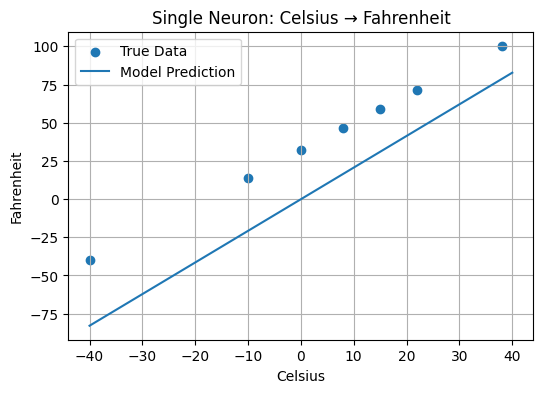

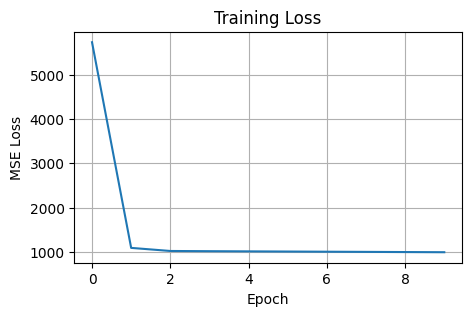

In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# for reproducibility
torch.manual_seed(0)

# ----------------------------
# 1. Training Data (force float32)
# ----------------------------
X = torch.tensor([[-40.0], [-10.0], [0.0], [8.0], [15.0], [22.0], [38.0]], dtype=torch.float32)
y = torch.tensor([[-40.0], [14.0], [32.0], [46.4], [59.0], [71.6], [100.4]], dtype=torch.float32)

# ----------------------------
# 2. Model: Single Neuron
# ----------------------------
model = nn.Linear(1, 1)  # y = w*x + b, x → [ w1*x + b1 ]
model = nn.Linear(1, 1)  # y = w*x + b, x → [ w1*x + b1 ,  w2*x + b2 ,  w3*x + b3 ]

# ----------------------------
# 3. Loss & Optimizer
# ----------------------------
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # <== smaller lr

# ----------------------------
# 4. Training Loop
# ----------------------------


loss_history = []
for epoch in range(10):
    # forward
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d} | Loss = {loss.item():.6f}")


# ----------------------------
# 5. Print learned parameters
# ----------------------------

# Show parameters
print("Weights:\n", model.weight.data)
print("Biases:\n", model.bias.data)
print("\nLearned weight:", w)
print("Learned bias:  ", b)



# ----------------------------
# 6. Plot data & model line
# ----------------------------
with torch.no_grad():
    X_line = torch.linspace(-40, 40, steps=100).unsqueeze(1)
    y_line = model(X_line)

plt.figure(figsize=(6,4))
plt.scatter(X.numpy(), y.numpy(), label="True Data")
plt.plot(X_line.numpy(), y_line.numpy(), label="Model Prediction")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.legend()
plt.title("Single Neuron: Celsius → Fahrenheit")
plt.grid(True)
plt.show()

# ----------------------------
# 7. Plot loss curve
# ----------------------------
plt.figure(figsize=(5,3))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()


Epoch    0 | Loss = 3354.282471

Prediction:

tensor([[-40.0000, -70.7242],
        [-10.0000, -10.5901],
        [  0.0000,   9.4546],
        [  8.0000,  25.4904],
        [ 15.0000,  39.5217],
        [ 22.0000,  53.5530],
        [ 38.0000,  85.6245]], grad_fn=<CatBackward0>)


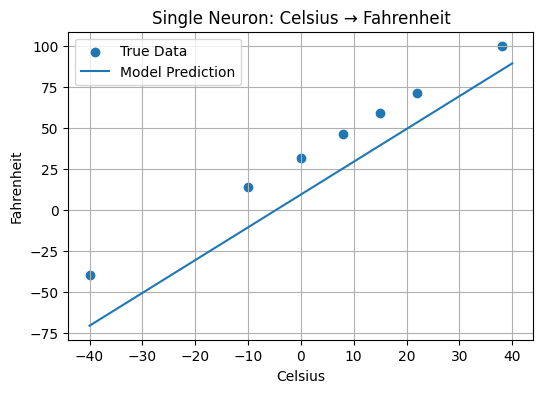

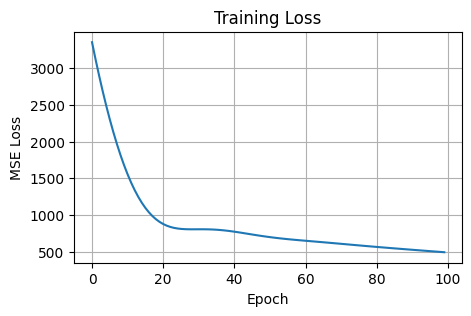


=== ALL WEIGHTS & BIASES ===

Layer 0 - Linear(1 → 1)
Weights:
 tensor([[2.0045]])
Bias:
 tensor([9.4546])
----------------------------------------


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


# for reproducibility
torch.manual_seed(0)


# ----------------------------
# 1. Training Data (force float32)
# ----------------------------


X = torch.tensor([[-40.0], [-10.0], [0.0], [8.0], [15.0], [22.0], [38.0]], dtype=torch.float32)
y = torch.tensor([[-40.0], [14.0], [32.0], [46.4], [59.0], [71.6], [100.4]], dtype=torch.float32)


# ----------------------------
# 2. Model: Single Neuron
# ----------------------------

model = nn.Sequential(
    nn.Linear(1, 1)
)



'''
model = nn.Sequential(
    nn.Linear(1, 3),   # hidden layer with 3 neurons
    nn.ReLU(),         # activation
    nn.Linear(3, 1)    # output layer (1 neuron)
)



model = nn.Sequential(
    nn.Linear(1, 3),   # hidden layer with 3 neurons
    nn.ReLU(),         # activation
    nn.Linear(3, 1)    # output layer (1 neuron)
)



model = nn.Sequential(
    nn.Linear(1, 16),
   nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)
'''



# ----------------------------
# 3. Loss & Optimizer
# ----------------------------
loss_fn = nn.MSELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # <== smaller lr
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# ----------------------------
# 4. Training Loop
# ----------------------------


loss_history = []
for epoch in range(100):
    # forward
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d} | Loss = {loss.item():.6f}")



# ----------------------------
# 5. Print learned parameters
# ----------------------------

# Show parameters
print("\nPrediction:\n")
print(torch.hstack([X, model(X)]))


# ----------------------------
# 6. Plot data & model line
# ----------------------------
with torch.no_grad():
    X_line = torch.linspace(-40, 40, steps=100).unsqueeze(1)
    y_line = model(X_line)

plt.figure(figsize=(6,4))
plt.scatter(X.numpy(), y.numpy(), label="True Data")
plt.plot(X_line.numpy(), y_line.numpy(), label="Model Prediction")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.legend()
plt.title("Single Neuron: Celsius → Fahrenheit")
plt.grid(True)
plt.show()

# ----------------------------
# 7. Plot loss curve
# ----------------------------
plt.figure(figsize=(5,3))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()

print("\n=== ALL WEIGHTS & BIASES ===\n")

for idx, layer in enumerate(model):
    if isinstance(layer, nn.Linear):
        print(f"Layer {idx} - Linear({layer.in_features} → {layer.out_features})")
        print("Weights:\n", layer.weight.data)
        print("Bias:\n", layer.bias.data)
        print("-" * 40)


In [ ]:
for idx, layer in enumerate(model):
    if isinstance(layer, nn.Linear):
        print(f"Layer {idx} - Linear({layer.in_features} → {layer.out_features})")
        print("Weights:\n", layer.weight.data)
        print("Bias:\n", layer.bias.data)
        print("-" * 40)


Layer 0 - Linear(1 → 1)
Weights:
 tensor([[2.0190]])
Bias:
 tensor([6.0533])
----------------------------------------


In [ ]:
print(model[0].weight)
print(model[0].bias)


Parameter containing:
tensor([[-0.0075],
        [ 1.1733],
        [-1.5421]], requires_grad=True)
Parameter containing:
tensor([ -0.7359,   9.1839, -12.3408], requires_grad=True)


# Non GPU

In [1]:
import torch
import torch.nn as nn



# for reproducibility
torch.manual_seed(0)


# ----------------------------
# 1. Training Data (force float32)
# ----------------------------


X = torch.tensor([[-40.0], [-10.0], [0.0], [8.0], [15.0], [22.0], [38.0]], dtype=torch.float32)
y = torch.tensor([[-40.0], [14.0], [32.0], [46.4], [59.0], [71.6], [100.4]], dtype=torch.float32)


# ----------------------------
# 2. Model: Single Neuron
# ----------------------------

model = nn.Sequential(
    nn.Linear(1, 1)
)



'''
model = nn.Sequential(
    nn.Linear(1, 3),   # hidden layer with 3 neurons
    nn.ReLU(),         # activation
    nn.Linear(3, 1)    # output layer (1 neuron)
)



model = nn.Sequential(
    nn.Linear(1, 3),   # hidden layer with 3 neurons
    nn.ReLU(),         # activation
    nn.Linear(3, 1)    # output layer (1 neuron)
)



model = nn.Sequential(
    nn.Linear(1, 16),
   nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)
'''



# ----------------------------
# 3. Loss & Optimizer
# ----------------------------
loss_fn = nn.MSELoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # <== smaller lr
optimizer = torch.optim.Adam(model.parameters(), lr=1)

# ----------------------------
# 4. Training Loop
# ----------------------------

loss_history = []
for epoch in range(100):
    # forward
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d} | Loss = {loss.item():.6f}")



# ----------------------------
# 5. Print learned parameters
# ----------------------------

# Show parameters
print("\nPrediction:\n")
print(torch.hstack([X, model(X)]))


print("\n=== ALL WEIGHTS & BIASES ===\n")

for idx, layer in enumerate(model):
    if isinstance(layer, nn.Linear):
        print(f"Layer {idx} - Linear({layer.in_features} → {layer.out_features})")
        print("Weights:\n", layer.weight.data)
        print("Bias:\n", layer.bias.data)
        print("-" * 40)


Epoch    0 | Loss = 3354.282471

Prediction:

tensor([[-40.0000, -40.4118],
        [-10.0000,  13.7526],
        [  0.0000,  31.8074],
        [  8.0000,  46.2513],
        [ 15.0000,  58.8896],
        [ 22.0000,  71.5280],
        [ 38.0000, 100.4157]], grad_fn=<CatBackward0>)

=== ALL WEIGHTS & BIASES ===

Layer 0 - Linear(1 → 1)
Weights:
 tensor([[1.8055]])
Bias:
 tensor([31.8074])
----------------------------------------


In [8]:
celsius = torch.tensor([[20.0]], dtype=torch.float32)  # input must be 2D
fahrenheit = model(celsius)
fahrenheit


tensor([[67.9170]], grad_fn=<AddmmBackward0>)

# GPU

In [ ]:
import torch

print("CUDA Available:", torch.cuda.is_available())
print("GPU Count:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0))
print("CUDA Device:", torch.cuda.current_device())
print("Total GPU Memory (GB):", round(torch.cuda.get_device_properties(0).total_memory / (1024**3), 2))

1 GB = 1024 MB
1 MB = 1024 KB
1 KB = 1024 bytes


In [ ]:
import torch
import torch.nn as nn


torch.manual_seed(0)

# ----------------------------
# 0. Device setup
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)



# ----------------------------
# 1. Training Data (force float32)
# ----------------------------
X = torch.tensor(
    [[-40.0], [-10.0], [0.0], [8.0], [15.0], [22.0], [38.0]],
    dtype=torch.float32,
    device=device,          # <<< move data to GPU
)
y = torch.tensor(
    [[-40.0], [14.0], [32.0], [46.4], [59.0], [71.6], [100.4]],
    dtype=torch.float32,
    device=device,          # <<< move data to GPU
)

# ----------------------------
# 2. Model: Single Neuron
# ----------------------------
model = nn.Sequential(
    nn.Linear(1, 1)
).to(device)                # <<< move model to GPU

# ----------------------------
# 3. Loss & Optimizer
# ----------------------------
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1)

# ----------------------------
# 4. Training Loop
# ----------------------------
loss_history = []
for epoch in range(100):
    # forward
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d} | Loss = {loss.item():.6f}")

# ----------------------------
# 5. Print learned parameters
# ----------------------------
print("\nPrediction:\n")
with torch.no_grad():
    preds = model(X)
    # move to CPU if you later want to use .numpy()
    print(torch.hstack([X, preds]))

print("\n=== ALL WEIGHTS & BIASES ===\n")
for idx, layer in enumerate(model):
    if isinstance(layer, nn.Linear):
        print(f"Layer {idx} - Linear({layer.in_features} → {layer.out_features})")
        print("Weights:\n", layer.weight.data)
        print("Bias:\n", layer.bias.data)
        print("-" * 40)
